In [4]:
from scipy import io
import nibabel
import numpy as np
from nilearn import image


subject_1 = io.loadmat('original/subject_1.mat')

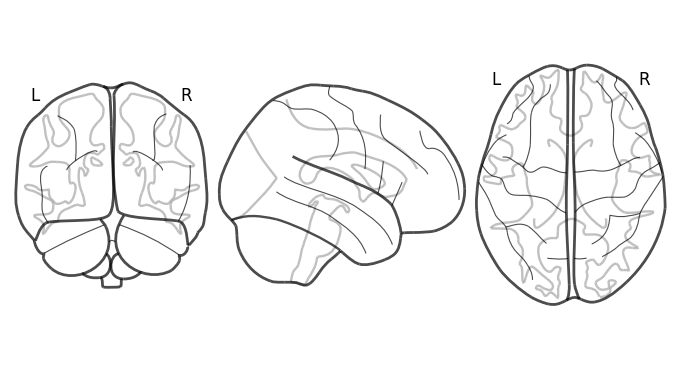

In [2]:
from nilearn import plotting

display = plotting.plot_glass_brain(None)

In [3]:
coords = subject_1['meta']['colToCoord'][0][0]
display.add_markers([coords[0]], marker_size=70)

In [12]:
subject_1['meta']['colToCoord'][0][0]
subject_1['meta']['matrix'][0][0]

array([[  -3,    0,    0,   81],
       [   0,    3,    0, -115],
       [   0,    0,    3,  -73],
       [   0,    0,    0,    1]], dtype=int16)

In [18]:
subject_1['data'].shape

(1351, 37913)

In [5]:
data = subject_1['data']
image_12 = data[11, :]


In [16]:
image_12.shape

(37913,)

In [2]:
subject_1

NameError: name 'subject_1' is not defined

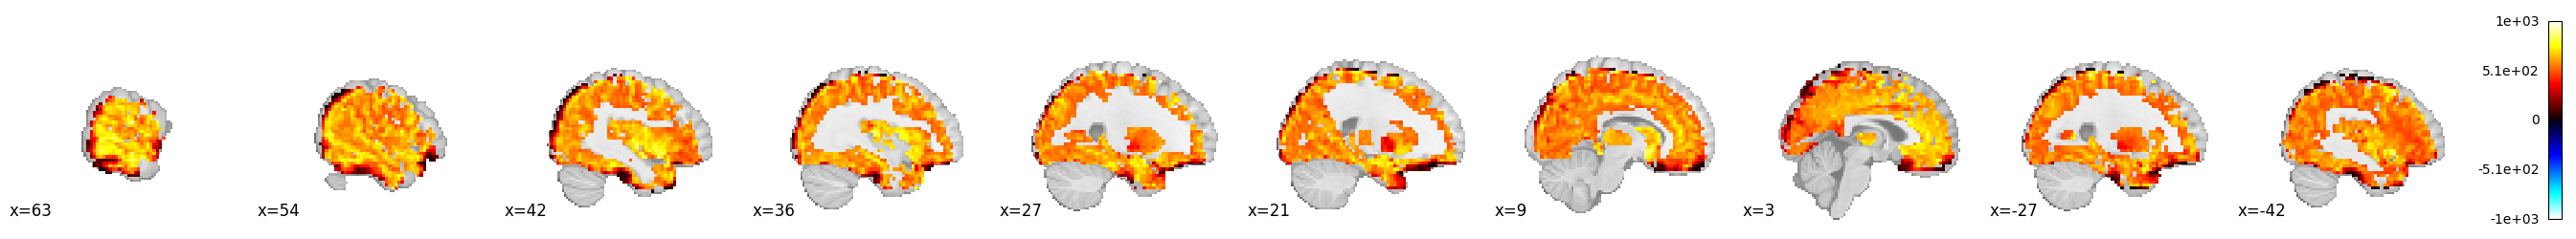

In [6]:
new_img = nibabel.Nifti1Image(np.zeros((53, 61, 51)),
                              affine=subject_1['meta']['matrix'][0][0])
new_img_data = new_img.get_fdata()

for i in range(image_12.shape[0]):
    this_i_value = image_12[i]
    new_img_data[(coords[i][0], coords[i][1], coords[i][2])] = this_i_value
plotting.plot_stat_map(image.new_img_like(new_img, new_img_data), display_mode='x', cut_coords=10)




In [42]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import nibabel as nib
import numpy as np
from nilearn import plotting, image

# Assuming you have 'data', 'coords', and 'subject_1' defined somewhere before this point.

new_img = nib.Nifti1Image(np.zeros((53, 61, 51)),
                          affine=subject_1['meta']['matrix'][0][0])
new_img_data = new_img.get_fdata()

# Create a PdfPages object to save figures into a PDF file
pdf_pages = PdfPages('output_figures.pdf')

for i in range(20):
    image_i = data[i, :]
    # find the top 95th percentile value
    max_i = np.percentile(image_i, 95)
    
    for j in range(image_i.shape[0]):
        if image_i[j] >= max_i :
            this_i_value = image_i[j]
        else:
            this_i_value = 0
        new_img_data[(coords[j][0], coords[j][1], coords[j][2])] = this_i_value

    display = plotting.plot_stat_map(image.new_img_like(new_img, new_img_data), display_mode='y', cut_coords=None)
    filename = f'figure_{i + 1}.png'
    plt.savefig(filename)
    
    # Add the current figure to the PDF
    pdf_pages.savefig(plt.gcf())

    # Close the current figure to free up resources
    plt.close()

    # Delete the image file
    os.remove(filename)

# Close the PdfPages object to finalize the PDF file
pdf_pages.close()


AttributeError: 'XSlicer' object has no attribute 'figure'

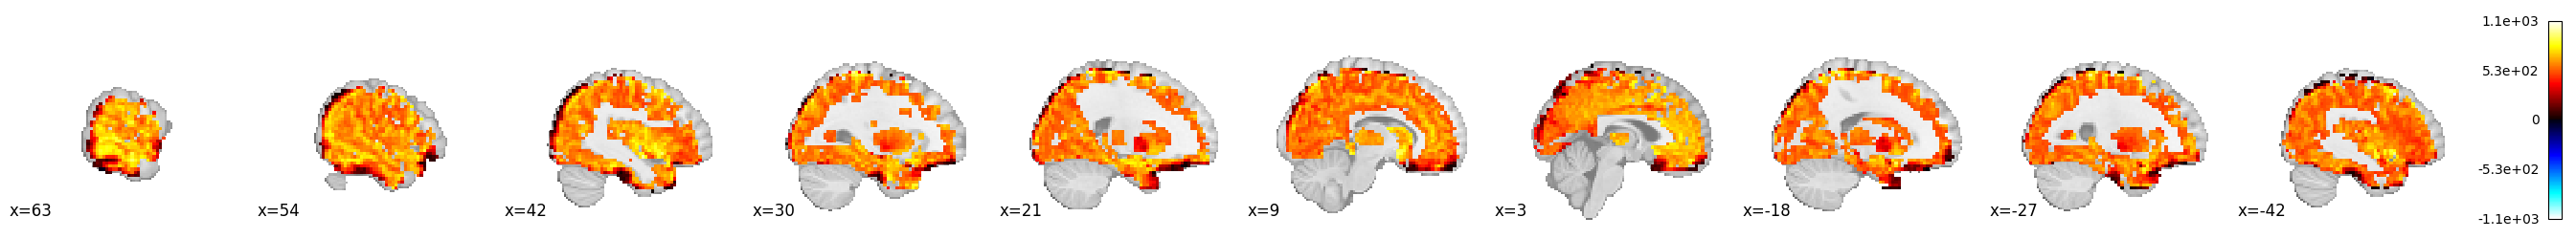

In [29]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# ... (previous code)

# Create a PDF file to store all the figures
pdf_filename = 'all_figures.pdf'
pdf_pages = PdfPages(pdf_filename)

for i in range(20):
    image_i = data[i, :]
    for j in range(image_i.shape[0]):
        this_i_value = image_i[j]
        new_img_data[(coords[j][0], coords[j][1], coords[j][2])] = this_i_value
        
    display = plotting.plot_stat_map(image.new_img_like(new_img, new_img_data), display_mode='x', cut_coords=10)
    
    # Save the current figure to the PDF file
    pdf_pages.savefig(display.figure)
    
    # Optionally, close the figure to free up resources
    plt.close(display.figure)

# Close the PDF file
pdf_pages.close()


In [30]:
display.init_with_figure()

TypeError: BaseSlicer.init_with_figure() missing 1 required positional argument: 'img'

In [35]:
image_12.shape

(37913,)

In [58]:
for i in subject_1['words'][0]:
    print(i[0][0][0])
#put i in to a text file space separating the words
#for each word in the list of words, write to the file
with open('words.txt', 'w') as f:
    for i in subject_1['words'][0]:
        f.write(i[0][0][0][0] + ' ')
#close the file
f.close()

    


['Harry']
['had']
['never']
['believed']
['he']
['would']
['meet']
['a']
['boy']
['he']
['hated']
['more']
['than']
['Dudley,']
['but']
['that']
['was']
['before']
['he']
['met']
['Draco']
['Malfoy.']
['Still,']
['first-year']
['Gryffindors']
['only']
['had']
['Potions']
['with']
['the']
['Slytherins,']
['so']
['they']
["didn't"]
['have']
['to']
['put']
['up']
['with']
['Malfoy']
['much.']
['Or']
['at']
['least,']
['they']
["didn't"]
['until']
['they']
['spotted']
['a']
['notice']
['pinned']
['up']
['in']
['the']
['Gryffindor']
['common']
['room']
['that']
['made']
['them']
['all']
['groan.']
['Flying']
['lessons']
['would']
['be']
['starting']
['on']
['Thursday']
['--']
['and']
['Gryffindor']
['and']
['Slytherin']
['would']
['be']
['learning']
['together.']
['+']
['"Typical,"']
['said']
['Harry']
['darkly.']
['"Just']
['what']
['I']
['always']
['wanted.']
['To']
['make']
['a']
['fool']
['of']
['myself']
['on']
['a']
['broomstick']
['in']
['front']
['of']
['Malfoy."']
['+']
['He']
['ha

In [69]:
subject_1['meta']['colToCoord']

#find the lowest y value in the coords
min_y = coords[0][1]

for i in range(len(coords)):
    if coords[i][1] < min_y:
        min_y = coords[i][1]
        min_y_index = i
min_y_index

subject_1['meta']['colToCoord'][0][0][min_y_index]

array([17,  4, 24], dtype=uint8)